In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

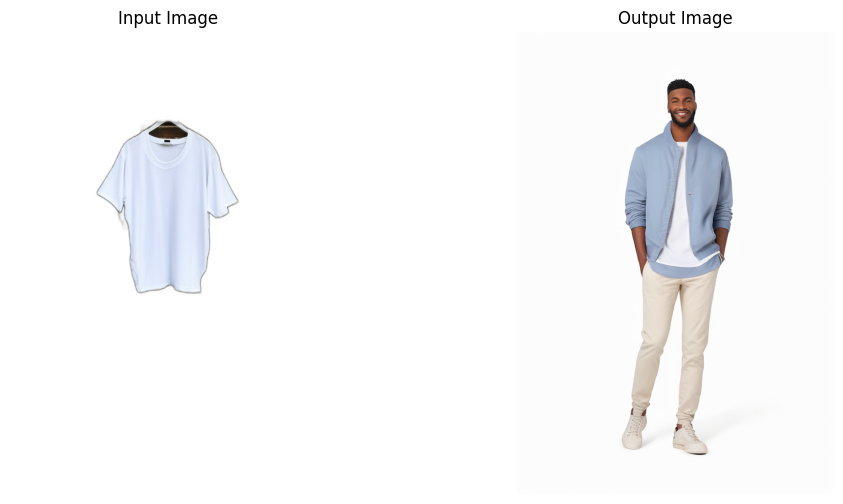

'try.png'

In [4]:
# 必要なパッケージのインストール
!pip install diffusers transformers safetensors accelerate

# パッケージのインポート
import matplotlib.pyplot as plt
import random
import torch
from PIL import Image
from datetime import datetime
from diffusers import StableDiffusionXLImg2ImgPipeline

# StableDiffusionのImg2Imgパイプラインの初期化
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

'''
pipe.load_lora_weights(
    "/kaggle/input/zemi-10-safetensors",
    weight_name="zemi-10.safetensors",
    local_files_only=True
)
'''

pipe.enable_attention_slicing()

# 画像の読み込みとリサイズの関数
'''
def load_and_resize_image(image_path):
    image = Image.open(image_path).resize((512,768)).convert("RGB")
    return image
'''
def load_and_resize_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

# 画像変換の関数
def imgToImg(prompt, image_path):
    num_inference_steps = 30
    guidance_scale = 8
    n_prompt = "low quality, cutoff, cropped, blurry, watermark, text, logo, extra limbs, deformed, nsfw, bad hands, bad anatomy"
    seed = random.randint(1, 1000000)
    torch.manual_seed(seed)
    strength = 0.95

    input_image = load_and_resize_image(image_path)
    if input_image is None:
        raise ValueError("インプット画像がありません。'./'に画像[サンプル1.png] or [サンプル2.png]が存在するか確認してください。")

    try:
        edit_image = pipe(
            prompt,
            negative_prompt=n_prompt,
            image=input_image,
            num_inference_steps=num_inference_steps,
            strength=strength,
            guidance_scale=guidance_scale
        ).images[0]
        output_image_path = "try.png"
        edit_image.save(output_image_path)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(edit_image)
        plt.title("Output Image")
        plt.axis('off')

        plt.show()

        return output_image_path

    except Exception as e:
        print(e)
        return None

# プログラムの実行
#prompt = "full-body fashion design based on the pants, add top, hat, and shoes, studio lighting, high detail,a man"
#prompt="Generate a full-body image of a man, add pants, top and shoes in a studio setting with high detail and realistic lighting."
#prompt="Generate a full-body image of a man, add pants, shoes in blank areas, ues blank areas, a studio setting with high detail and realistic lighting"
prompt = "a full-body photo of a stylish man wearing the uploaded clothing item,casual fashion, realistic lighting, high quality, neutral background"
image_path = "/kaggle/input/sample-ver5/White_bg_tshirt.png"

imgToImg(prompt, image_path)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

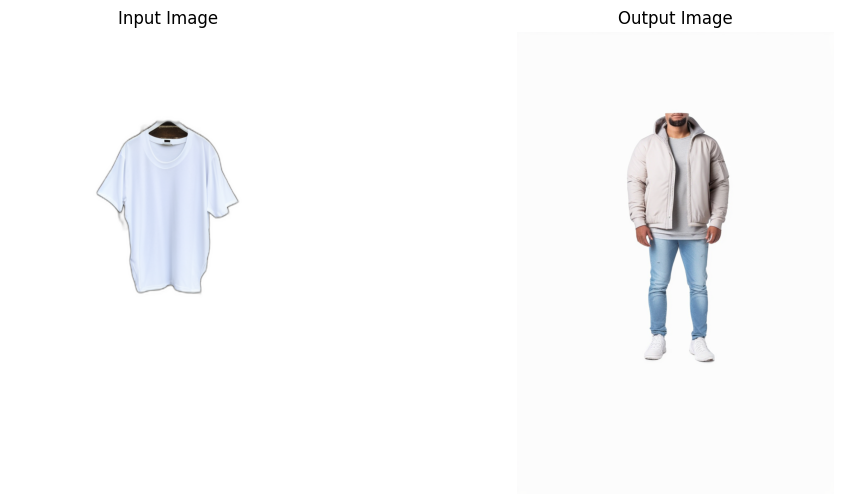

'try.png'

In [5]:
# 必要なパッケージのインストール
!pip install diffusers transformers safetensors accelerate

# パッケージのインポート
import matplotlib.pyplot as plt
import random
import torch
from PIL import Image
from datetime import datetime
from diffusers import StableDiffusionXLImg2ImgPipeline

# StableDiffusionのImg2Imgパイプラインの初期化
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")


pipe.load_lora_weights(
    "/kaggle/input/zemi-10-safetensors",
    weight_name="zemi-10.safetensors",
    local_files_only=True
)

pipe.enable_attention_slicing()

# 画像の読み込みとリサイズの関数
'''
def load_and_resize_image(image_path):
    image = Image.open(image_path).resize((512,768)).convert("RGB")
    return image
'''
def load_and_resize_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

# 画像変換の関数
def imgToImg(prompt, image_path):
    num_inference_steps = 30
    guidance_scale = 8
    n_prompt = "low quality, cutoff, cropped, blurry, watermark, text, logo, extra limbs, deformed, nsfw, bad hands, bad anatomy"
    seed = random.randint(1, 1000000)
    torch.manual_seed(seed)
    strength = 0.95

    input_image = load_and_resize_image(image_path)
    if input_image is None:
        raise ValueError("インプット画像がありません。'./'に画像[サンプル1.png] or [サンプル2.png]が存在するか確認してください。")

    try:
        edit_image = pipe(
            prompt,
            negative_prompt=n_prompt,
            image=input_image,
            num_inference_steps=num_inference_steps,
            strength=strength,
            guidance_scale=guidance_scale
        ).images[0]
        output_image_path = "try_LoRA.png"
        edit_image.save(output_image_path)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(edit_image)
        plt.title("Output Image")
        plt.axis('off')

        plt.show()

        return output_image_path

    except Exception as e:
        print(e)
        return None

# プログラムの実行
#prompt = "full-body fashion design based on the pants, add top, hat, and shoes, studio lighting, high detail,a man"
#prompt="Generate a full-body image of a man, add pants, top and shoes in a studio setting with high detail and realistic lighting."
#prompt="Generate a full-body image of a man, add pants, shoes in blank areas, ues blank areas, a studio setting with high detail and realistic lighting"
prompt = "a full-body photo of a stylish man wearing the uploaded clothing item,casual fashion, realistic lighting, high quality, neutral background"
image_path = "/kaggle/input/sample-ver5/White_bg_tshirt.png"

imgToImg(prompt, image_path)